In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori 
from mlxtend.preprocessing import TransactionEncoder


In [21]:
# Step 1: Data Collection
df = pd.read_excel("data/online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [22]:
# Step 2: Data processing

# drop missing values
missing_data = df.dropna(subset=["Description","StockCode","Invoice"])

# remove stockCodes which start with 'C'
rm_data = missing_data[~missing_data['StockCode'].astype(str).str.startswith('C')]
transactions = rm_data.groupby('Invoice')['Description'].apply(list).values

# convert transactions to list and remove duplicates
transaction_list = [list(set(transaction)) for transaction in transactions]
print(f"======> Total Transactions: {len(transaction_list)} rows  <======", )

transaction_limit = transaction_list[:7]
unique_item_transactions = [item for transaction in transaction_limit for item in transaction]
count = len(set(unique_item_transactions))

print(f"======>Total Unique Items Across {len(transaction_limit)} transactions<======")
print("-"*50)
print("======> Items in 7 transactions <======")

for transaction in transaction_limit:
    print(transaction)
    
    


======> Total Transactions: 25880 rows  <======
======>Total Unique Items Across 7 transactions<======
--------------------------------------------------
======> Items in 7 transactions <======
['FANCY FONT HOME SWEET HOME DOORMAT', 'STRAWBERRY CERAMIC TRINKET BOX', 'PINK CHERRY LIGHTS', 'SAVE THE PLANET MUG', ' WHITE CHERRY LIGHTS', 'RECORD FRAME 7" SINGLE SIZE ', 'PINK DOUGHNUT TRINKET POT ', '15CM CHRISTMAS GLASS BALL 20 LIGHTS']
['DOG BOWL , CHASING BALL DESIGN', 'HEART MEASURING SPOONS LARGE', 'LUNCHBOX WITH CUTLERY FAIRY CAKES ', 'CAT BOWL ']
['DOOR MAT BLACK FLOCK ', 'CHRISTMAS CRAFT WHITE FAIRY ', 'CLASSIC WHITE FRAME', 'FULL ENGLISH BREAKFAST PLATE', 'SET OF 3 BLACK FLYING DUCKS', 'HEART FILIGREE DOVE LARGE', 'HEART IVORY TRELLIS LARGE', 'SMALL MARSHMALLOWS PINK BOWL', 'PLEASE ONE PERSON  METAL SIGN', 'ASSORTED COLOUR BIRD ORNAMENT', 'BATH BUILDING BLOCK WORD', 'PIZZA PLATE IN BOX', 'SCOTTIE DOG HOT WATER BOTTLE', 'BISCUITS SMALL BOWL LIGHT BLUE', 'BLACK DINER WALL CLOCK', ' P

In [23]:
# Step 3 : Show Binary matrix and ensure all items in each transactions no duplicate

# ensure all items are string
str_transaction = [[str(item) for item in set(transaction)] for transaction in transactions]

tranEncode = TransactionEncoder()
tranEncodeArray = tranEncode.fit(transaction_limit).transform(transaction_limit)
binary_matrix = pd.DataFrame(tranEncodeArray, columns=tranEncode.columns_)
print("======> Binary Matrix <====== \n" , binary_matrix.astype(int))

======> Binary Matrix <====== 
     PEACE WOODEN BLOCK LETTERS   VINTAGE DESIGN GIFT TAGS  \
0                            0                          0   
1                            0                          0   
2                            1                          0   
3                            0                          0   
4                            0                          0   
5                            0                          1   
6                            0                          0   

    WHITE CHERRY LIGHTS  15CM CHRISTMAS GLASS BALL 20 LIGHTS  \
0                     1                                    1   
1                     0                                    0   
2                     0                                    0   
3                     0                                    0   
4                     0                                    0   
5                     0                                    0   
6                     0        

In [24]:
# Step 4: Generate Frequent Itemsets Using Apriori

min_confidence = 0.4
min_lift = 1.2
min_support = 0.01

results = list(apriori(str_transaction, min_support=min_support,min_confidence=min_confidence,min_lift=min_lift))

print(f"Size of Result: {len(results)}")
print("=====> Association Rules <=====")
for result in results:
    items = list(result.items)  
    support = result.support
    for ordered_stat in result.ordered_statistics:
        antecedent = list(ordered_stat.items_base)
        consequent = list(ordered_stat.items_add)
        confidence = ordered_stat.confidence
        lift = ordered_stat.lift
        if antecedent and consequent:
            print(f"Rule: {antecedent} -> {consequent}")
            print(f"Support: {support:.4f}\nConfidence: {confidence:.4f}\nLift: {lift:.4f}")
            print("-" * 30)


Size of Result: 111
=====> Association Rules <=====
Rule: ['72 SWEETHEART FAIRY CAKE CASES'] -> ['60 TEATIME FAIRY CAKE CASES']
Support: 0.0183
Confidence: 0.5412
Lift: 10.4367
------------------------------
Rule: ['PACK OF 60 DINOSAUR CAKE CASES'] -> ['60 TEATIME FAIRY CAKE CASES']
Support: 0.0162
Confidence: 0.5866
Lift: 11.3122
------------------------------
Rule: ['PACK OF 60 MUSHROOM CAKE CASES'] -> ['60 TEATIME FAIRY CAKE CASES']
Support: 0.0107
Confidence: 0.4860
Lift: 9.3726
------------------------------
Rule: ['60 TEATIME FAIRY CAKE CASES'] -> ['PACK OF 60 PINK PAISLEY CAKE CASES']
Support: 0.0230
Confidence: 0.4434
Lift: 9.8917
------------------------------
Rule: ['PACK OF 60 PINK PAISLEY CAKE CASES'] -> ['60 TEATIME FAIRY CAKE CASES']
Support: 0.0230
Confidence: 0.5129
Lift: 9.8917
------------------------------
Rule: ['PACK OF 60 SPACEBOY CAKE CASES'] -> ['60 TEATIME FAIRY CAKE CASES']
Support: 0.0117
Confidence: 0.5058
Lift: 9.7550
------------------------------
Rule: ['

In [25]:
# Step 5 :  display frequent Items in DataFrame

results_df = pd.DataFrame([(tuple(result.items), result.support) 
                           for result in results], 
                          columns=['Itemset', 'Support'])
print("===> Frequent DataFrame <====\n",results_df)



===> Frequent DataFrame <====
                                                Itemset   Support
0    (72 SWEETHEART FAIRY CAKE CASES, 60 TEATIME FA...  0.018277
1    (PACK OF 60 DINOSAUR CAKE CASES, 60 TEATIME FA...  0.016229
2    (PACK OF 60 MUSHROOM CAKE CASES, 60 TEATIME FA...  0.010742
3    (60 TEATIME FAIRY CAKE CASES, PACK OF 60 PINK ...  0.022991
4    (PACK OF 60 SPACEBOY CAKE CASES, 60 TEATIME FA...  0.011708
..                                                 ...       ...
106  (WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...  0.023532
107  (72 SWEETHEART FAIRY CAKE CASES, 60 TEATIME FA...  0.011206
108  (PACK OF 72 RETRO SPOT CAKE CASES, 60 TEATIME ...  0.012210
109  (SWEETHEART CERAMIC TRINKET BOX, STRAWBERRY CE...  0.011051
110  (WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...  0.012172

[111 rows x 2 columns]


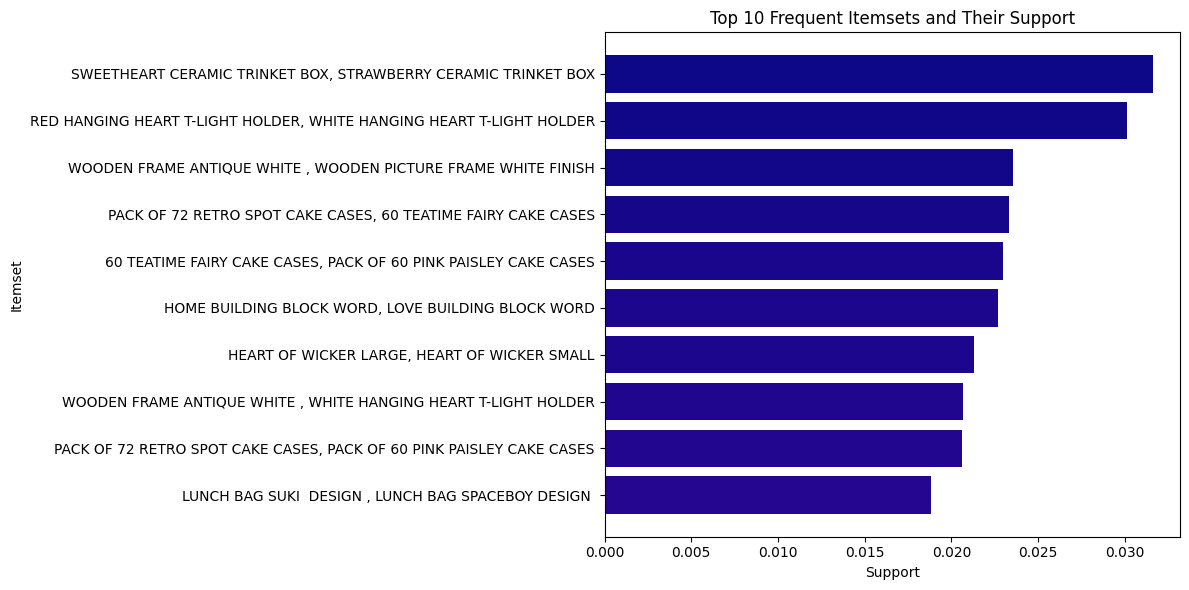

In [26]:
# display graphic of frequent dataframe

results_df['Itemset_str'] = results_df['Itemset'].apply(lambda x: ', '.join(x))

top_10_results = results_df.sort_values(by='Support', ascending=False).head(10)
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot
plt.barh(top_10_results['Itemset_str'], top_10_results['Support'], color=plt.cm.plasma(range(256)))

# Title and labels
plt.title('Top 10 Frequent Itemsets and Their Support')
plt.xlabel('Support')
plt.ylabel('Itemset')

# Invert y-axis to have the most frequent itemset on top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()